In [33]:
import numpy as np
import pandas as pd

# Importing Data

In [34]:
star = pd.read_csv("6 class csv.csv")
star.head()

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Spectral Class
0,3068,0.002400,0.1700,16.12,0,M
1,3042,0.000500,0.1542,16.60,0,M
2,2600,0.000300,0.1020,18.70,0,M
3,2800,0.000200,0.1600,16.65,0,M
4,1939,0.000138,0.1030,20.06,0,M


# Asq Six Question to yourself

In [35]:
star.shape

(240, 6)

In [36]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius              240 non-null    float64
 3   Absolute magnitude  240 non-null    float64
 4   Star type           240 non-null    int64  
 5   Spectral Class      240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [37]:
star.isnull().sum()

Temperature           0
Luminosity            0
Radius                0
Absolute magnitude    0
Star type             0
Spectral Class        0
dtype: int64

In [38]:
star.duplicated().sum()

0

In [39]:
star.describe()

,Temperature,Luminosity,Radius,Absolute magnitude,Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


# Exploring Data

In [40]:
corr = star.corr()
corr

C:\Users\mdzid\AppData\Local\Temp\ipykernel_9796\1231498987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = star.corr()


,Temperature,Luminosity,Radius,Absolute magnitude,Star type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845
Radius,0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


<Axes: >

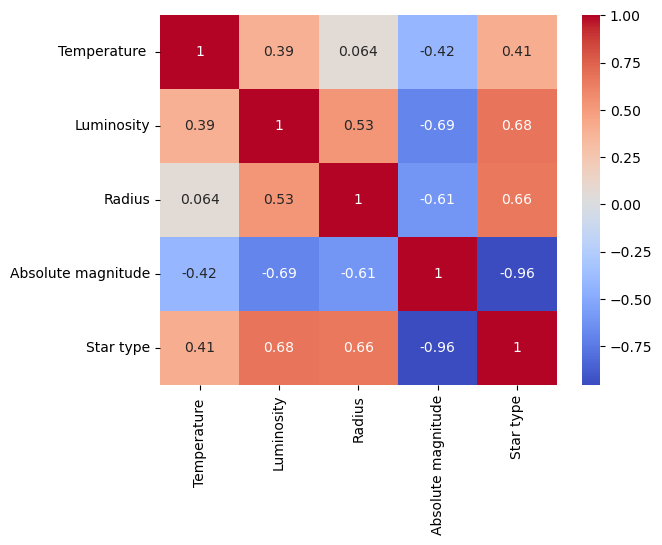

In [41]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [42]:
star['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

# Encoding

In [43]:
star_dict = {
    'A': 1,
    'B': 2,
    'F': 3,
    'G': 4,
    'K': 5,
    'M': 6,
    'O': 7
    
}
star['star_num']=star['Spectral Class'].map(star_dict)

In [44]:
star['star_num'].value_counts()

6    111
2     46
7     40
1     19
3     17
5      6
4      1
Name: star_num, dtype: int64

In [45]:
# crop.drop(['label'],axis=1,inplace=True)
star.head()

,Temperature,Luminosity,Radius,Absolute magnitude,Star type,Spectral Class,star_num
0,3068,0.002400,0.1700,16.12,0,M,6
1,3042,0.000500,0.1542,16.60,0,M,6
2,2600,0.000300,0.1020,18.70,0,M,6
3,2800,0.000200,0.1600,16.65,0,M,6
4,1939,0.000138,0.1030,20.06,0,M,6


# Train Test Split

In [46]:
X = star.drop(['star_num','Spectral Class'],axis=1)
y = star['star_num']

In [47]:
X

,Temperature,Luminosity,Radius,Absolute magnitude,Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5
236,30839,834042.000000,1194.0000,-10.63,5
237,8829,537493.000000,1423.0000,-10.73,5
238,9235,404940.000000,1112.0000,-11.23,5


In [48]:
y

0      6
1      6
2      6
3      6
4      6
      ..
235    7
236    7
237    1
238    1
239    7
Name: star_num, Length: 240, dtype: int64

In [49]:
y.shape

(240,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [52]:
X_train.shape

(192, 5)

In [53]:
X_test.shape

(48, 5)

In [54]:
X_train

,Temperature,Luminosity,Radius,Absolute magnitude,Star type
237,8829,537493.00000,1423.0000,-10.73,5
17,3692,0.00367,0.4700,10.80,1
10,3600,0.00290,0.5100,10.69,1
107,12893,184000.00000,36.0000,-6.34,4
75,3180,0.00100,0.3500,11.76,1
...,...,...,...,...,...
7,2600,0.00040,0.0960,17.40,0
197,3496,0.00125,0.3360,14.94,1
202,14982,0.00118,0.0113,12.23,2
53,3749,550000.00000,1648.0000,-8.05,5



# Scale the features using MinMaxScaler

In [55]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [56]:
X_train

array([[1.81025196e-01, 6.32776483e-01, 7.30304200e-01, 3.72107567e-02,
        1.00000000e+00],
       [4.60576443e-02, 4.22641332e-09, 2.36901201e-04, 7.10444028e-01,
        2.00000000e-01],
       [4.36404719e-02, 3.31991241e-09, 2.57429901e-04, 7.07004378e-01,
        2.00000000e-01],
       [2.87801161e-01, 2.16618398e-01, 1.84715192e-02, 1.74484053e-01,
        8.00000000e-01],
       [3.26055542e-02, 1.08309199e-09, 1.75315100e-04, 7.40462789e-01,
        2.00000000e-01],
       [1.05015633e-01, 1.59746651e-06, 5.63307535e-04, 5.12195122e-01,
        6.00000000e-01],
       [3.18462468e-01, 1.28558301e-03, 2.94412355e-03, 3.08943089e-01,
        6.00000000e-01],
       [1.39013689e-01, 0.00000000e+00, 2.36080053e-06, 8.13008130e-01,
        4.00000000e-01],
       [4.43761330e-02, 6.38082456e-09, 1.97383453e-04, 7.00437774e-01,
        2.00000000e-01],
       [4.52168887e-02, 4.27350427e-01, 8.58608577e-01, 0.00000000e+00,
        1.00000000e+00],
       [3.98859725e-01, 2.7665

# Standarization

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train

array([[-0.18437296,  2.36855642,  2.20645253, -1.38391501,  1.40862438],
       [-0.716437  , -0.6303825 , -0.46822699,  0.64570727, -0.89803558],
       [-0.72596589, -0.6303825 , -0.46815178,  0.63533763, -0.89803558],
       [ 0.23655526,  0.39624437, -0.40142252, -0.97007192,  0.83195939],
       [-0.76946733, -0.63038251, -0.46845262,  0.73620599, -0.89803558],
       [-0.48401502, -0.63037495, -0.46703117,  0.04803866,  0.2552944 ],
       [ 0.35742712, -0.62428971, -0.45830879, -0.56471308,  0.2552944 ],
       [-0.34998915, -0.63038252, -0.46908626,  0.95491122, -0.32137059],
       [-0.72306579, -0.63038249, -0.46837177,  0.61554103, -0.89803558],
       [-0.71975139,  1.39497379,  2.67650932, -1.49609571,  1.40862438],
       [ 0.67436619,  0.68079856, -0.31305185, -1.02192014,  0.83195939],
       [-0.81151872, -0.63038252, -0.46888883,  1.26694326, -1.47470057],
       [-0.73632337,  0.13958765,  2.20081185, -1.14352779,  1.40862438],
       [ 0.52521839, -0.63038251, -0.4

# Training Models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
 
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.8333333333333334
Naive Bayes  with accuracy : 0.4583333333333333


In [60]:
rfc = LogisticRegression()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.8333333333333334

# Predictive System

In [61]:
def recommendation(temp,N,rad,absm,st):
    features = np.array([[temp,N,rad,absm,st]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [64]:
temp=2600
N=0.0003
rad=0.102
absm=18.7
st=0

predict = recommendation(temp,N,rad,absm,st)


star_dict = {1: "A", 2: "B", 3: "F", 4: "G", 5: "K", 6: "M", 7: "O"
                 }

if predict[0] in star_dict:
    star = star_dict[predict[0]]
    
else:
    print("Sorry are not able to predict the star")

In [63]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))